# You first Tensorflow model in production

You will learn here a basic use case : imagine that you spend money on marketing operations, leading to subscribers gained on your Youtube channel.

How to predict amount of subscribers for a specifc marketing budget ?



---



# Initialize your notebook

In [14]:
!pip install matplotlib
!pip install -U scikit-learn
!pip install numpy
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

Requirement already up-to-date: scikit-learn in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.23.2)


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sys
import os

# Create a dataset


*   1 array for marketing budget
*   1 array for subscribers gained

In [3]:
mar_budget    = np.array([60, 80,  120  , 40, 50, 20, 90,  10],  dtype=float)
subs_gained = np.array([160, 200, 240, 100, 140, 80, 220, 60],  dtype=float)

for i,c in enumerate(mar_budget):
    print("{} Market budget = {} new subscribers gained".format(c, subs_gained[i]))

60.0 Market budget = 160.0 new subscribers gained
80.0 Market budget = 200.0 new subscribers gained
120.0 Market budget = 240.0 new subscribers gained
40.0 Market budget = 100.0 new subscribers gained
50.0 Market budget = 140.0 new subscribers gained
20.0 Market budget = 80.0 new subscribers gained
90.0 Market budget = 220.0 new subscribers gained
10.0 Market budget = 60.0 new subscribers gained


# Graph your dataset
We use matplotlib here

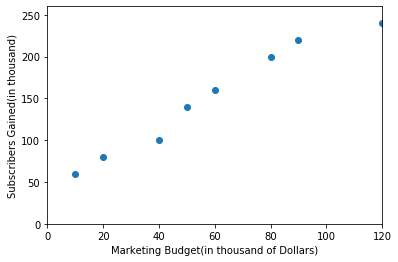

In [4]:
plt.scatter(mar_budget, subs_gained)
plt.xlim(0,120)
plt.ylim(0,260)
plt.xlabel('Marketing Budget(in thousand of Dollars)')
plt.ylabel('Subscribers Gained(in thousand)')
plt.show()

# Split your dataset


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mar_budget,subs_gained,random_state=42,train_size=0.8, test_size=0.2)

# Create a neuronal network
Here we create the simpliest TensorFlow model we can, with 1 neuron only.

In [6]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Declare a new model
Since our dataset is pretty linear, we will use Mean Squared Erros (MSE) regression model.

Useful doc : https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

In [7]:
def create_model():
    model = tf.keras.Sequential([layer_0])
    model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
    return model

In [8]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Train you model

In [9]:
trained_model = model.fit(X_train, y_train, epochs=1000, verbose=False)
print("Finished training the model")

Instructions for updating:
Use tf.cast instead.
Finished training the model


# Check your model trainings

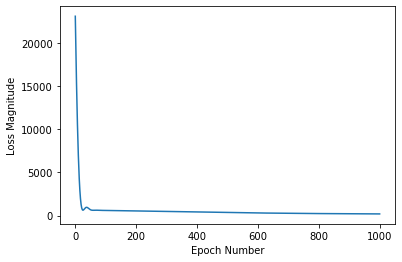

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(trained_model.history['loss'])

# Test your model with a new marketing budget

In [11]:
print(model.predict([50.0]))
print(model.predict([200.0]))

[[128.4153]]
[[411.8814]]


# Export your model 

In [12]:
!mkdir /tmp/my_models_h5

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/tmp/my_models_h5/my_model.h5') 


In [13]:
!ls /tmp/my_models_h5

my_model.h5
